이거 머지? 확인필요

In [ ]:
import pandas as pd
#데이터 로드
x_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/x_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/y_train.csv")
x_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/x_test.csv")


display(x_train.head())
display(y_train.head())
x_train['sex'].value_counts()
x_train.info()

,ID,age,sex,bmi,children,smoker,region
0,2,35,female,35.860,2,no,southeast
1,3,28,female,23.845,2,no,northwest
2,4,23,female,32.780,2,yes,southeast
3,6,52,female,25.300,2,yes,southeast
4,7,63,male,39.800,3,no,southwest


,ID,charges
0,2,5836.52040
1,3,4719.73655
2,4,36021.01120
3,6,24667.41900
4,7,15170.06900


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1070 non-null   int64  
 1   age       1070 non-null   int64  
 2   sex       1070 non-null   object 
 3   bmi       1070 non-null   float64
 4   children  1070 non-null   int64  
 5   smoker    1070 non-null   object 
 6   region    1070 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 58.6+ KB


In [ ]:
# 원핫인코딩

from sklearn.ensemble import RandomForestClassifier
category = ['sex','smoker','region']
for i in category:
  x_train[i]= x_train[i].astype('category')
  x_test[i]= x_test[i].astype('category')

x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)
print(x_train.head())
print(x_test.head())

   ID  age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0   2   35  35.860         2           1         0          1           0   
1   3   28  23.845         2           1         0          1           0   
2   4   23  32.780         2           1         0          0           1   
3   6   52  25.300         2           1         0          0           1   
4   7   63  39.800         3           0         1          1           0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 0                 1                 0  
1                 0                 1                 0                 0  
2                 0                 0                 1                 0  
3                 0                 0                 1                 0  
4                 0                 0                 0                 1  
   ID  age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0   

# 여기서부터 공부 시작

In [ ]:
x_traind = x_train.drop('ID', axis =1)
x_testd = x_test.drop('ID', axis =1)
y = y_train[['charges']]

In [ ]:
print(x_traind.shape[0])
print(x_testd.shape[0])
print(y.shape[0])

1070
268
1070


In [ ]:
# train_test_split

from sklearn.model_selection import train_test_split
xtr, xte, ytr, yte =  train_test_split(x_traind, y, test_size = 0.3, random_state= 2023)

In [ ]:
print(xtr.shape[0])
print(xte.shape[0])
print(ytr.shape[0])
print(yte.shape[0])

749
321
749
321


In [ ]:
# modeling

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(xtr,ytr)
# pred1= model1.predict(xte)

LinearRegression()

In [ ]:
pred1= model1.predict(xte)

In [ ]:
pred1.shape[0]

321

In [ ]:
# mse 계산

from sklearn.metrics import mean_squared_error
import numpy as np

rmse1 = np.sqrt(mean_squared_error(yte,pred1))
rmse1

6496.897849102666

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2 =RandomForestRegressor()
model2.fit(xtr,ytr)
pred2= model2.predict(xte)
from sklearn.metrics import mean_squared_error
import numpy as np
rmse2 = np.sqrt(mean_squared_error(yte,pred2))
print(rmse2)

<ipython-input-11-494d9b7901fb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(xtr,ytr)


5262.137602445776


In [ ]:
##모델 2 선택 (이거는 regression이랑 random이랑 해서 random이 나으니까 x_train 전체넣고 한거임)
model = RandomForestRegressor()
model.fit(x_traind,y)
pred = model.predict(x_testd)
pred
rmse2 = np.sqrt(mean_squared_error(yte,pred2))
print(rmse2)

<ipython-input-12-a43d222cb12e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_traind,y)


5262.137602445776


In [ ]:
result = x_test[['ID']]
result['charges'] = pred
# result.to_csv("00600.csv", index = False)
# cheak = pd.read_csv('00600.csv')
# cheak

<ipython-input-13-7b4ce1102fb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['charges'] = pred


In [ ]:
a=2
b=3
if(a==2 or b==3):
  print("True")
if(a==2 or b==3):
  print("True")
else:
  print("False")

True
True


In [ ]:
x=1
while x<=10:
  print(x)
  x=x+1

1
2
3
4
5
6
7
8
9
10


In [ ]:
data=[[1,2,3,4,5],
      [6,7,8,9,10],
      [11,12,13,14,15],
      [16,17,18,19,20]]

In [ ]:
data[0:1]

[[1, 2, 3, 4, 5]]

In [ ]:
print(data[:])
print(data[2:])
print(data[:2])

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15], [16, 17, 18, 19, 20]]
[[11, 12, 13, 14, 15], [16, 17, 18, 19, 20]]
[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]


In [ ]:
dic=[
    {'name':'hong',
     'phone':'01011112222',
     'age':20},
     {'name':'yang',
     'phone':'01033334444',
     'age':30},
      {'name':'kim',
     'phone':'01055556666',
     'age':40}
]

In [ ]:
for i in dic:
  print(i['name'], i['phone'], i['age'])

hong 01011112222 20
yang 01033334444 30
kim 01055556666 40


In [ ]:
import numpy as np
data=[0,1,2,3,4]
numbers = np.array(data)
print(numbers)
print(numbers.shape)
print(numbers.dtype)

[0 1 2 3 4]
(5,)
int64


In [ ]:
import pandas as pd
dic ={'name': ['yang','park','hong'],
      'major': ['Computer','Data science','Business'],
      'result': [2.8,3.1,3.5]}

obj =pd.DataFrame(dic)
print(obj)

   name         major  result
0  yang      Computer     2.8
1  park  Data science     3.1
2  hong      Business     3.5


<function matplotlib.pyplot.show(close=None, block=None)>

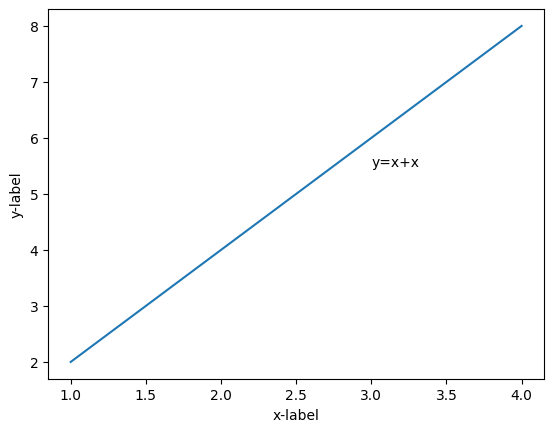

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4])
y = x+x
plt.plot(x,y)
plt.ylabel('y-label')
plt.xlabel('x-label')
plt.text(3,5.5, 'y=x+x', fontsize=10)
plt.show

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd

df = sns.load_dataset('planets')

print(df.head())



            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009


In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd

df = sns.load_dataset('planets')

len = int(len(df)*0.7)
df = df[:len]
df2 = df.copy()



TypeError: ignored

# 새 섹션

In [ ]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


# 작업형2 팽귄종 예측

In [ ]:
#연속형 변수 중 결측치가 존재하는 열을 확인후
#missing 리스트에 열이름을 입력
#for문으로 각 열별 중앙값을 결측치에 입력
# 성별과 같은 범주형의 경우 비중이 높은 남성으로 결측치입력
# 특정 변수의 경우 문자형으로 되어있어, 숫자로 변경필요
# LabelEncoder 모듈로 변환작업 수행
# apply함수로 label 변수에 리스트화 되어있는 변수들의 라벨인코딩 수행

In [ ]:
#펭귄종을 예측해보자
#Seaborn에 Sample data가 참 많다. 잘 써서 반복적으로 연습해보자
import seaborn as sns
df = sns.load_dataset('penguins')
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [ ]:
import seaborn as sns
import pandas as pd
sns.get_dataset_names()
df = sns.load_dataset('car_crashes')
print(df.head(9))

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   
5   13.6     5.032    3.808          10.744       12.920       835.50   
6   10.8     4.968    3.888           9.396        8.856      1068.73   
7   16.2     6.156    4.860          14.094       16.038      1137.87   
8    5.9     2.006    1.593           5.900        5.900      1273.89   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  
5      139.91     CO  
6      167.02     CT  
7      151.48     DE  
8      136.05     DC  


In [ ]:
 type(df)

pandas.core.frame.DataFrame

In [ ]:
data=df.sort_values(by=df.columns[2],ascending=False)
ten=data.iloc[9,2]
data.iloc[:10,2]=ten
result=data[(data['speeding']>=7)]
print('최종결과물은',result['alcohol'].mean())

최종결과물은 5.600099999999999


In [ ]:
data = df.sort_values(by=df.columns[2], ascending=False)
ten = data.iloc[9,2]
data.iloc[:10,2] = ten
data.head(11)

result = data[(data['speeding']>=7)]
print(result['alcohol'].mean())

5.600099999999999


In [ ]:
#결측치가 있는지 확인
df.isna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
#결측치를 채우는 작업 먼저 해보자
#각 열별로 중앙값 또는 평균 넣어주거나
missing_cols = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']

for col in missing_cols:
    df[col] = df[col].fillna(df[col].median())


In [ ]:
#남성이 아니면 여성일테니 둘 중 하나 임의로 넣기1
import random

num_of_na = df['sex'].isna().sum()
random_gender_list = random.choices(['Male','Female'],k=num_of_na )
cond_na = df['sex'].isna()
df.loc[:,'sex_without_na'] = df.sex
df.loc[cond_na,'sex_without_na'] = random_gender_list
# null값이 모두 채워진 것을 확인할 수 있음
df.loc[df.sex.isna(),:]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_without_na
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,NaN,Female
8,Adelie,Torgersen,34.10,18.1,193.0,3475.0,NaN,Male
9,Adelie,Torgersen,42.00,20.2,190.0,4250.0,NaN,Male
10,Adelie,Torgersen,37.80,17.1,186.0,3300.0,NaN,Female
11,Adelie,Torgersen,37.80,17.3,180.0,3700.0,NaN,Male
47,Adelie,Dream,37.50,18.9,179.0,2975.0,NaN,Female
246,Gentoo,Biscoe,44.50,14.3,216.0,4100.0,NaN,Female
286,Gentoo,Biscoe,46.20,14.4,214.0,4650.0,NaN,Male
324,Gentoo,Biscoe,47.30,13.8,216.0,4725.0,NaN,Female
336,Gentoo,Biscoe,44.50,15.7,217.0,4875.0,NaN,Female


In [ ]:
df.isna().sum(axis = 0)

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
sex_without_na        0
dtype: int64

In [ ]:
#Object컬럼이 존재한다 label 인코딩 해보기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                333 non-null    object 
 7   sex_without_na     344 non-null    object 
dtypes: float64(4), object(4)
memory usage: 21.6+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_cols = ['species','island','sex']

#fit과 transform을 한번에
le = LabelEncoder()
#help(le)
df.loc[:,label_cols] = df.loc[:,label_cols].apply(le.fit_transform)
df.head()


<ipython-input-10-6951dcc8b192>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,label_cols] = df.loc[:,label_cols].apply(le.fit_transform)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_without_na
0,0,2,39.10,18.7,181.0,3750.0,1,Male
1,0,2,39.50,17.4,186.0,3800.0,0,Female
2,0,2,40.30,18.0,195.0,3250.0,0,Female
3,0,2,44.45,17.3,197.0,4050.0,2,Female
4,0,2,36.70,19.3,193.0,3450.0,0,Female


In [ ]:
#데이터 변환, 더미처리

import pandas as pd
df.dtypes
#label인코딩을해서 int64로된 경우
#순서가 부여되어버리니까 수정필요


species                int64
island                 int64
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
sex_without_na        object
dtype: object

In [ ]:
category_cols = ['island','sex']
for col in category_cols:
    df[col] = df[col].astype('category')
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   species                344 non-null    int64  
 1   bill_length_mm         344 non-null    float64
 2   bill_depth_mm          344 non-null    float64
 3   flipper_length_mm      344 non-null    float64
 4   body_mass_g            344 non-null    float64
 5   island_0               344 non-null    uint8  
 6   island_1               344 non-null    uint8  
 7   island_2               344 non-null    uint8  
 8   sex_0                  344 non-null    uint8  
 9   sex_1                  344 non-null    uint8  
 10  sex_2                  344 non-null    uint8  
 11  sex_without_na_Female  344 non-null    uint8  
 12  sex_without_na_Male    344 non-null    uint8  
dtypes: float64(4), int64(1), uint8(8)
memory usage: 16.2 KB


In [ ]:
#더미 변수는 뭘까요? 옆으로 펴는겁니다.
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_0,island_1,island_2,sex_0,sex_1,sex_2,sex_without_na_Female,sex_without_na_Male
0,0,39.10,18.7,181.0,3750.0,0,0,1,0,1,0,0,1
1,0,39.50,17.4,186.0,3800.0,0,0,1,1,0,0,1,0
2,0,40.30,18.0,195.0,3250.0,0,0,1,1,0,0,1,0
3,0,44.45,17.3,197.0,4050.0,0,0,1,0,0,1,1,0
4,0,36.70,19.3,193.0,3450.0,0,0,1,1,0,0,1,0


In [ ]:
#4 파생변수 만들기
#정규분포 연속형 변수가 있으면 구간화 시켜줌
# Quantile-based discretization function.
quantile_cut_col = pd.qcut(df.body_mass_g,5,labels= False)
df['quntile_body_mass_g'] = quantile_cut_col
df.loc[:,['body_mass_g','quntile_body_mass_g']]


,body_mass_g,quntile_body_mass_g
0,3750.0,1
1,3800.0,1
2,3250.0,0
3,4050.0,2
4,3450.0,0
...,...,...
339,4050.0,2
340,4850.0,3
341,5750.0,4
342,5200.0,4


In [ ]:
# help('sklearn.preprocessing')

In [ ]:
#5. 전처리 스케일 작업
#시험장에서 기억안나면 헬프함수
#help('sklearn.preprocessing')
from sklearn.preprocessing import MinMaxScaler
tobe_scaled_cols = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
min_max_scaler= MinMaxScaler()
#fit함수를 통해서 min_max_scaler object가 parameter를 학습
min_max_scaler.fit(df[tobe_scaled_cols])
df[tobe_scaled_cols] = min_max_scaler.transform(df[tobe_scaled_cols])
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_0,island_1,island_2,sex_0,sex_1,sex_2,sex_without_na_Female,sex_without_na_Male,quntile_body_mass_g
0,0,0.254545,0.666667,0.152542,0.291667,0,0,1,0,1,0,0,1,1
1,0,0.269091,0.511905,0.237288,0.305556,0,0,1,1,0,0,1,0,1
2,0,0.298182,0.583333,0.389831,0.152778,0,0,1,1,0,0,1,0,0
3,0,0.449091,0.500000,0.423729,0.375000,0,0,1,0,0,1,1,0,2
4,0,0.167273,0.738095,0.355932,0.208333,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,2,0.449091,0.500000,0.423729,0.375000,1,0,0,0,0,1,1,0,2
340,2,0.534545,0.142857,0.728814,0.597222,1,0,0,1,0,0,1,0,3
341,2,0.665455,0.309524,0.847458,0.847222,1,0,0,0,1,0,0,1,4
342,2,0.476364,0.202381,0.677966,0.694444,1,0,0,1,0,0,1,0,4


In [ ]:
#6. 데이터분리

from sklearn.model_selection import train_test_split
#종속변수(species)를 제외한 데이터 불러오기
#imbalance 방지
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['species']),\
                                                    df.species, test_size = 0.2,\
                                                    stratify= df.species ,\
                                                    random_state = 1234) # 층화추출
# 분리 결과확인

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(275, 13)
(69, 13)
(275,)
(69,)


In [ ]:
#7 모형 학습
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)
pred1 = model1.predict(X_test)

In [ ]:
X_test.isna().sum()

bill_length_mm           0
bill_depth_mm            0
flipper_length_mm        0
body_mass_g              0
island_0                 0
island_1                 0
island_2                 0
sex_0                    0
sex_1                    0
sex_2                    0
sex_without_na_Female    0
sex_without_na_Male      0
quntile_body_mass_g      0
dtype: int64

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model2 = AdaBoostClassifier()
model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)
pred2

array([0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 2])

In [ ]:
#앙상블
#RandomForest와 AdaBoostClassifer를 Voting으로 앙상블
from sklearn.ensemble import VotingClassifier
classifer = VotingClassifier(estimators = [('rf_model',model1),('ad_model',model2)],\
                             voting ='hard')
classifer.fit(X_train,y_train)
pred3 = classifer.predict(X_test)

In [ ]:
#9.모형평가
from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report

print('randomfrest accuarcy', accuracy_score(y_test,pred1))
print('Ada accuarcy', accuracy_score(y_test,pred2))
print('Voting accuarcy', accuracy_score(y_test,pred3))






randomfrest accuarcy 0.9710144927536232
Ada accuarcy 0.7971014492753623
Voting accuarcy 0.7971014492753623


In [ ]:
#10.하이퍼파라미터 튜닝
#빅분기에서 이까지 나오진 않음
from sklearn.model_selection import GridSearchCV
#2개는학습 1개는 테스트 3벌로 진행
#서칭할 4가지 조합(트리몇개를 쓸거야? 50개, 100개 뎁쓰는?)
parameters = {'n_estimators': [50,100], 'max_depth':[4,6]}
model4 = RandomForestClassifier()
clf = GridSearchCV(estimator = model4, param_grid = parameters, cv=3)

clf.fit(X_train,y_train)
print('최적의 파라미터', clf.best_params_)

#8강 18분

최적의 파라미터 {'max_depth': 6, 'n_estimators': 50}


In [ ]:
#11 예측값 저장
#False로 안하면 잘못됌, index = False로 꼭 해야 컬럼이 3개됨
pd.DataFrame({'id':y_test.index, 'pred':pred3}).to_csv('00300.csv',index=False)

In [ ]:
check = pd.read_csv('00300.csv')
check.head()

,id,pred
0,177,0
1,314,2
2,153,0
3,330,2
4,53,0


Hold-OUt: 데이터 셋을 훈련 vs 테스트로 2분 하는 방법을 말함
RF: 다수의 DT모형으로 앙상블하여 오버피팅 방지(배깅)
AdaBoost: 약한 분류기들 상호보완 하도록 순차적으로 학습하여 최종적으로 강한 분류기의 성능을 내도록 만든 모형
Voting: 여러개의 분류기의 결과값을 투표하여 최종 예측 결과를 결정, 하드보팅(투표)와 소프트 보팅(확률평균) 2개가 있음.

# 연습장


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
import pandas as pd
#데이터 로드
x_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/X_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/y_train.csv")
x_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/X_test.csv")


display(x_train.head())
display(y_train.head())

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0


,carID,price
0,13207,31995
1,17314,7700
2,12342,58990
3,13426,12999
4,16004,16990


In [ ]:
x_train.info()
x_train.describe(include ='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   carID         4960 non-null   int64   
 1   brand         4960 non-null   category
 2   model         4960 non-null   object  
 3   year          4960 non-null   int64   
 4   transmission  4960 non-null   category
 5   mileage       4960 non-null   int64   
 6   fuelType      4960 non-null   category
 7   tax           4960 non-null   float64 
 8   mpg           4960 non-null   float64 
 9   engineSize    4960 non-null   float64 
dtypes: category(3), float64(3), int64(3), object(1)
memory usage: 286.7+ KB


,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
count,4960.000000,4960,4960,4960.000000,4960,4960.000000,4960,4960.000000,4960.000000,4960.000000
unique,NaN,9,90,NaN,4,NaN,5,NaN,NaN,NaN
top,NaN,merc,Arteon,NaN,Manual,NaN,Diesel,NaN,NaN,NaN
freq,NaN,790,167,NaN,1948,NaN,2989,NaN,NaN,NaN
mean,15832.446169,NaN,NaN,2016.737903,NaN,24956.286895,NaN,152.332661,50.370766,2.124375
std,2206.717006,NaN,NaN,2.884035,NaN,24443.333662,NaN,82.403844,35.746505,0.789368
min,12002.000000,NaN,NaN,1997.000000,NaN,1.000000,NaN,0.000000,2.800000,0.000000
25%,13929.250000,NaN,NaN,2016.000000,NaN,5641.250000,NaN,145.000000,38.700000,1.600000
50%,15840.000000,NaN,NaN,2017.000000,NaN,19000.000000,NaN,145.000000,47.100000,2.000000
75%,17765.750000,NaN,NaN,2019.000000,NaN,36702.000000,NaN,150.000000,54.300000,2.800000


In [ ]:
x_train.describe(include ='all')

# brand transmission	fuelType
x_train['fuelType'].value_counts()
category = ['brand','transmission','fuelType']
for i in category:
  x_train[i] = x_train[i].astype('category')
  x_test[i] = x_test[i].astype('category')

In [ ]:
x_train
x_train_drop  = x_train.drop(['carID','model','brand'], axis =1)
x_test_drop  = x_test.drop(['carID','model','brand'],axis =1)

In [ ]:
x_train_drop = pd.get_dummies(x_train_drop)
x_test_drop = pd.get_dummies(x_test_drop)

In [ ]:
from sklearn.model_selection import train_test_split
xtr, xte, ytr, yte =  train_test_split(x_train_drop, y_train['price'], test_size = 0.3, random_state= 2023)

In [ ]:
from sklearn.linear_model import LinearRegression
model1 =LinearRegression()
model1.fit(xtr,ytr)
pred1= model1.predict(xte)

from sklearn.metrics import mean_squared_error
import numpy as np
rmse1 = np.sqrt(mean_squared_error(yte,pred1))



from sklearn.ensemble import RandomForestRegressor
model2 =RandomForestRegressor()
model2.fit(xtr,ytr)
pred2= model2.predict(xte)
from sklearn.metrics import mean_squared_error
import numpy as np
rmse2 = np.sqrt(mean_squared_error(yte,pred2))
print("li", rmse1)
print("rf", rmse2)

li 9425.832800999602
rf 5233.710147268581


In [ ]:
model = RandomForestRegressor()
model.fit(x_train_drop,y_train['carID'])
pred = model.predict(x_test_drop)
pred

array([16052.78, 15485.16, 15700.35, ..., 15114.97, 16017.95, 15543.59])

In [ ]:
result =x_test[['carID']]
result['price']= pred
result


<ipython-input-96-6f25a73fdda9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['price']= pred


,carID,price
0,12000,16052.78
1,12001,15485.16
2,12004,15700.35
3,12013,17023.70
4,12017,16457.51
...,...,...
2667,19618,16330.36
2668,19620,17151.68
2669,19626,15114.97
2670,19630,16017.95


In [ ]:
an =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/y_test.csv')

In [ ]:
rmse1 = np.sqrt(mean_squared_error(an['price'],result['price']))
rmse1

18423.760849610615